In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

from sklearn.linear_model import LogisticRegression as lg
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score as acc

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_data = pd.read_csv("datasets/train.csv")

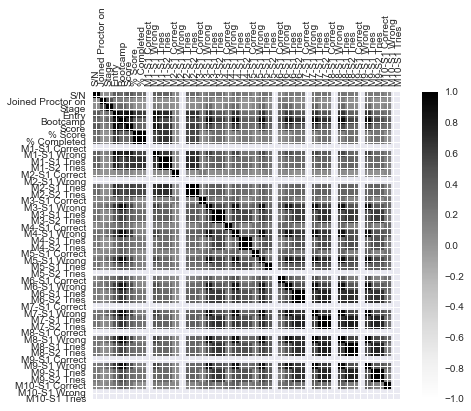

In [3]:
correlations = train_data.corr()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,47,1)
ax.set_yticks(ticks)
ax.set_xticks(ticks)
ax.set_xticklabels(train_data.columns, rotation='vertical')
ax.set_yticklabels(train_data.columns)
plt.show()

In [4]:
static_fields = []
for c in train_data.columns:
    if len(list(train_data[c].unique()))<=1:
        static_fields.append(c)

static_fields


['M1-S2 Tries',
 'M3-S1 Correct',
 'M6-S1 Tries',
 'M7-S2 Tries',
 'M8-S2 Tries',
 'M9-S2 Tries']

In [5]:
train_data=train_data.drop(static_fields,axis=1)

In [6]:
train_data['% Completed'].unique()
train_data['Score'].unique()

array([113, 104,   0, 108, 103, 110, 117, 105, 114, 107, 101, 109, 112,
       102, 100, 111, 128, 106, 115, 177, 180, 125, 162, 183, 185, 116,
       168, 122, 179, 155, 172, 150, 167, 173, 182, 159, 174, 176, 181,
       170, 157, 165, 145, 141, 142, 186, 118, 151, 171, 160, 130, 175,
       187, 149, 153, 184, 121, 156, 169, 161, 129, 126, 127, 120, 178,
       164, 190, 139, 136, 132, 124, 163, 140, 131, 158, 135, 191,  90,
       119, 188, 192, 123, 148, 138, 134,  99, 154,  84, 166, 152,  92,
       133,  91,  95,  93,  89,  79, 189, 143,  98, 147, 146,  66, 144,
        80,  82,  96,  78,  88,  97,  81, 137,  87,  69,  86,  72,  75])

In [7]:
complete_treshold=train_data[train_data['% Completed']==100]
complete_treshold[complete_treshold.Bootcamp==False].count()
# Seems applicants who completed the tests didn't get in

S/N                  519
Joined Proctor on    519
Stage                519
Entry                519
Bootcamp             519
Score                519
% Score              519
% Completed          519
M1-S1 Correct        519
M1-S1 Wrong          519
M1-S1 Tries          519
M2-S1 Correct        519
M2-S1 Wrong          519
M2-S1 Tries          519
M2-S2 Tries          519
M3-S1 Wrong          519
M3-S1 Tries          519
M3-S2 Tries          519
M4-S1 Correct        519
M4-S1 Wrong          519
M4-S1 Tries          519
M4-S2 Tries          519
M5-S1 Correct        519
M5-S1 Wrong          519
M5-S1 Tries          519
M5-S2 Tries          519
M6-S1 Correct        519
M6-S1 Wrong          519
M6-S2 Tries          519
M7-S1 Correct        519
M7-S1 Wrong          519
M7-S1 Tries          519
M8-S1 Correct        519
M8-S1 Wrong          519
M8-S1 Tries          519
M9-S1 Correct        519
M9-S1 Wrong          519
M9-S1 Tries          519
M10-S1 Correct       519
M10-S1 Wrong         519


In [8]:
score_treshold_set=[]
for i in train_data['Score'].unique():
    score_treshold=train_data[train_data['Score']<=i]
    if score_treshold['Bootcamp'][score_treshold.Bootcamp==True].count()==0:
        score_treshold_set.append(i)
score_treshold_set

[0, 90, 84, 92, 91, 93, 89, 79, 66, 80, 82, 78, 88, 81, 87, 69, 86, 72, 75]

In [9]:
confident_bad_scores = score_treshold_set

In [10]:
score_treshold_set=[]
for i in train_data['Score'].unique():
    score_treshold=train_data[train_data['Score']>=i]
    if score_treshold['Bootcamp'][score_treshold.Bootcamp==False].count()==0:
        score_treshold_set.append(i)
score_treshold_set

[]

In [11]:
no_a=train_data['Score'].count()
top_1_percent=(no_a/100)*1
top_1_percent_scores=sorted(list(train_data['Score']),reverse=True)[:top_1_percent]
top_1_percent_scores

[192,
 192,
 192,
 192,
 191,
 191,
 191,
 191,
 190,
 190,
 190,
 190,
 190,
 190,
 189,
 189,
 189,
 189,
 189,
 189,
 188,
 188,
 188,
 188,
 188,
 188,
 188,
 188,
 188,
 188,
 188,
 188,
 188,
 187,
 187,
 187,
 187,
 187,
 187,
 187,
 187,
 187,
 187,
 187,
 187,
 187,
 187,
 187,
 187,
 186,
 186,
 186,
 186,
 186,
 186,
 186,
 186,
 186,
 186,
 186,
 186,
 185,
 185,
 185,
 185,
 185,
 185,
 185,
 185,
 185]

In [12]:
train_data_1iter=train_data[train_data['Score']>=92]
train_data_1iter.groupby('Bootcamp')['Bootcamp'].count()

Bootcamp
False    2881
True      125
Name: Bootcamp, dtype: int64

In [13]:
train_data_1iter['% Completed'].unique()

array([ 20,  13, 100,   6,  33,  46,  60,  66,  93,  40,  53,  86,  26,
        80,  73,  12,  18,  25,  62,  37,  50,  43,  56,  81,  75,  68,
        87,  31])

In [14]:
train_data_1iter['Score'].unique()

array([113, 104, 108, 103, 110, 117, 105, 114, 107, 101, 109, 112, 102,
       100, 111, 128, 106, 115, 177, 180, 125, 162, 183, 185, 116, 168,
       122, 179, 155, 172, 150, 167, 173, 182, 159, 174, 176, 181, 170,
       157, 165, 145, 141, 142, 186, 118, 151, 171, 160, 130, 175, 187,
       149, 153, 184, 121, 156, 169, 161, 129, 126, 127, 120, 178, 164,
       190, 139, 136, 132, 124, 163, 140, 131, 158, 135, 191, 119, 188,
       192, 123, 148, 138, 134,  99, 154, 166, 152,  92, 133,  95,  93,
       189, 143,  98, 147, 146, 144,  96,  97, 137])

In [15]:
complete_treshold_set_score_g_92=[]
for i in train_data_1iter['% Completed'].unique():
    complete_treshold=train_data_1iter[train_data_1iter['% Completed']>=i]
    if complete_treshold['Bootcamp'][complete_treshold.Bootcamp==True].count()==0:
        complete_treshold_set_score_g_92.append(i)
complete_treshold_set_score_g_92

[]

In [16]:
from __future__ import division
train_data_1iter['score_v_completed']=train_data_1iter['Score']//train_data_1iter['% Completed']
train_data_1iter['score_v_completed'].unique()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array([ 5,  8,  1, 17, 16,  7,  3,  2,  4,  0,  6,  9])

In [17]:
train_data_1iter['Score'].corr(train_data_1iter['Bootcamp'])

0.35383728924539865

In [18]:
train_data['Joined Proctor on'].unique()

array(['12/29/2015', '1/4/2016', '3/8/2016', '2/4/2016', '1/7/2016',
       '2/19/2016', '3/11/2016', '12/30/2015', '1/6/2016', '2/22/2016',
       '2/25/2016', '2/29/2016', '3/17/2016', '3/29/2016', '3/1/2016',
       '3/9/2016', '3/28/2016', '3/30/2016', '3/22/2016', '3/21/2016',
       '3/18/2016', '3/19/2016', '3/20/2016', '3/25/2016', '6/2/2016',
       '5/6/2016', '5/18/2016', '5/7/2016', '5/23/2016', '6/10/2016',
       '6/13/2016', '6/24/2016', '6/20/2016', '7/28/2016', '4/21/2016',
       '6/28/2016', '4/15/2016', '2/18/2016', '4/11/2016', '4/8/2016',
       '5/4/2016', '5/16/2016', '5/5/2016', '5/20/2016', '7/24/2016',
       '7/11/2016', '7/8/2016', '8/29/2016', '9/2/2016', '7/14/2016',
       '9/5/2016', '9/14/2016', '9/12/2016', '9/3/2016', '6/21/2016',
       '9/8/2016', '9/1/2016', '9/9/2016', '9/16/2016', '6/16/2016',
       '6/23/2016'], dtype=object)

In [20]:
train_data_1iter['member_proctor']=train_data_1iter['Joined Proctor on'].map(lambda x: x[:x.find('/')]+x[len(x)-5:])
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data_1iter['member_proctor_c']=le.fit_transform(train_data_1iter['member_proctor'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
data_by_date = {}
for i in train_data_1iter['member_proctor'].unique():
    data_by_date[i]=train_data_1iter[train_data_1iter['member_proctor']==i]
    

In [31]:
treshold={}
for i in data_by_date.keys():
    print i
    print data_by_date[i].groupby('Bootcamp')['Bootcamp'].count()
    treshold[i]=[]
    for s in data_by_date[i]['Score'].unique():
        complete_treshold=train_data_1iter[train_data_1iter['Score']<=s]
        if complete_treshold['Bootcamp'][complete_treshold.Bootcamp==True].count()==0:
            treshold[i].append(s)
    print treshold[i]


3/2016
Bootcamp
False    413
True      12
Name: Bootcamp, dtype: int64
[]
6/2016
Bootcamp
False    8
Name: Bootcamp, dtype: int64
[]
12/2015
Bootcamp
False    1387
True       79
Name: Bootcamp, dtype: int64
[92]
5/2016
Bootcamp
False    42
True      2
Name: Bootcamp, dtype: int64
[]
8/2016
Bootcamp
False    27
Name: Bootcamp, dtype: int64
[]
2/2016
Bootcamp
False    785
True      26
Name: Bootcamp, dtype: int64
[93, 92]
1/2016
Bootcamp
False    138
True       6
Name: Bootcamp, dtype: int64
[]
4/2016
Bootcamp
False    40
Name: Bootcamp, dtype: int64
[]
7/2016
Bootcamp
False    18
Name: Bootcamp, dtype: int64
[]
9/2016
Bootcamp
False    23
Name: Bootcamp, dtype: int64
[]


In [32]:
train_data_1iter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 0 to 7077
Data columns (total 45 columns):
S/N                  3006 non-null int64
Joined Proctor on    3006 non-null object
Stage                3006 non-null object
Entry                3006 non-null int64
Bootcamp             3006 non-null bool
Score                3006 non-null int64
% Score              3006 non-null object
% Completed          3006 non-null int64
M1-S1 Correct        3006 non-null int64
M1-S1 Wrong          3006 non-null int64
M1-S1 Tries          3006 non-null int64
M2-S1 Correct        3006 non-null int64
M2-S1 Wrong          3006 non-null int64
M2-S1 Tries          3006 non-null int64
M2-S2 Tries          3006 non-null int64
M3-S1 Wrong          3006 non-null int64
M3-S1 Tries          3006 non-null int64
M3-S2 Tries          3006 non-null int64
M4-S1 Correct        3006 non-null int64
M4-S1 Wrong          3006 non-null int64
M4-S1 Tries          3006 non-null int64
M4-S2 Tries          3006 non-

# Time To Predict

In [88]:
# Outlier detection
from sklearn.ensemble import IsolationForest
from sklearn.cross_validation import cross_val_score
X=train_data_1iter.drop(['Joined Proctor on','Stage','% Score','member_proctor',
                         'Bootcamp','Entry','S/N','member_proctor_c'],axis=1)
y=train_data_1iter['Bootcamp']
def _replaceitem(x):
    if x == 0:
        return 1
    else:
        return -1


y = map(_replaceitem, y)
clf = IsolationForest(contamination=0.25,max_samples=50)
clf.fit(X)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
scores

array([ 0.85557429,  0.85008972,  0.85777994,  0.80422225,  0.69951166])

In [49]:
# Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
X=train_data_1iter.drop(['Joined Proctor on','Stage','% Score','member_proctor','Bootcamp','Entry','S/N'],axis=1)
y=train_data_1iter['Bootcamp']
clf = GradientBoostingClassifier(n_estimators=400, max_depth=6)
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
scores

array([ 0.94240525,  0.92252973,  0.93672194,  0.94276796,  0.93470814])

In [39]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
X=train_data_1iter.drop(['Joined Proctor on','Stage','% Score','member_proctor','Bootcamp','Entry','S/N'],axis=1)
y=train_data_1iter['Bootcamp']
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
scores

array([ 0.93976878,  0.93642807,  0.93637979,  0.94204322,  0.94014863])

In [44]:
# Linear basic
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
X=train_data_1iter.drop(['Joined Proctor on','Stage','% Score','member_proctor','Bootcamp','Entry','S/N'],axis=1)
y=train_data_1iter['Bootcamp']
clf = LogisticRegression()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
scores

array([ 0.93731704,  0.93637979,  0.93721349,  0.94204322,  0.92103293])

In [50]:
# Probabilistic
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.cross_validation import cross_val_score
X=train_data_1iter.drop(['Joined Proctor on','Stage','% Score','member_proctor','Bootcamp','Entry','S/N'],axis=1)
y=train_data_1iter['Bootcamp']
clf = GaussianProcessClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
scores

array([ 0.93023256,  0.92040898,  0.9424589 ,  0.93865421,  0.92872112])

In [51]:
# Probabilistic with decomposition
# hmmmmm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.cross_validation import cross_val_score
X=train_data_1iter.drop(['Joined Proctor on','Stage','% Score','member_proctor','Bootcamp','Entry','S/N'],axis=1)
y=train_data_1iter['Bootcamp']
clf = GaussianProcessClassifier()
decomp = TruncatedSVD(n_components=3, random_state=42)
clf.fit(decomp.fit_transform(X),y)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
scores

array([ 0.93023256,  0.92040898,  0.9424589 ,  0.93865421,  0.92872112])

In [56]:
# Support vectors with decomposition
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
X=train_data_1iter.drop(['Joined Proctor on','Stage','% Score','member_proctor','Bootcamp','Entry','S/N'],axis=1)
y=train_data_1iter['Bootcamp']
clf = SVC(C=10)
decomp = TruncatedSVD(n_components=3, random_state=42)
clf.fit(decomp.fit_transform(X),y)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
scores

array([ 0.94116356,  0.92104439,  0.94371391,  0.94858658,  0.9406662 ])

In [57]:
# Linear with encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
X=train_data_1iter.drop(['Joined Proctor on','Stage','% Score','member_proctor','Bootcamp','Entry','S/N'],axis=1)
y=train_data_1iter['Bootcamp']
clf = LogisticRegression()
enc = OneHotEncoder()
X = enc.fit_transform(X)
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
scores

array([ 0.94578242,  0.93139962,  0.93867996,  0.93827883,  0.94171729])

In [64]:
# Linear with encoding and decomposition
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
X=train_data_1iter.drop(['Joined Proctor on','Stage','% Score','member_proctor','Bootcamp','Entry','S/N'],axis=1)
y=train_data_1iter['Bootcamp']
clf = LogisticRegression()
enc = OneHotEncoder()
X = enc.fit_transform(X)
decomp = TruncatedSVD(n_components=3, random_state=42)
clf.fit(decomp.fit_transform(X),y)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
scores

array([ 0.94578242,  0.93139962,  0.93867996,  0.93827883,  0.94171729])

In [68]:
# Linear with encoding and transformations
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
X=train_data_1iter.drop(['Joined Proctor on','Stage','% Score','member_proctor','Bootcamp','Entry','S/N'],axis=1)
y=train_data_1iter['Bootcamp']
clf = LogisticRegression()
grad = GradientBoostingClassifier(n_estimators=400, max_depth=6)
grad.fit(X,y)
enc = OneHotEncoder()
X = enc.fit_transform(grad.apply(X)[:, :, 0])
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
scores

array([ 0.98075185,  0.97698356,  0.97542121,  0.9746901 ,  0.97920256])

In [87]:
# Linear with encoding, decomposition and transformations
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
X=train_data_1iter.drop(['Joined Proctor on','Stage','% Score','member_proctor',
                        'Bootcamp','Entry','S/N','member_proctor_c'],axis=1)
y=train_data_1iter['Bootcamp']
clf = LogisticRegression()
grad = GradientBoostingClassifier(n_estimators=2000, max_depth=12, random_state=42)
grad.fit(X,y)
enc = OneHotEncoder()
X = enc.fit_transform(grad.apply(X)[:, :, 0])
decomp = TruncatedSVD(n_components=3, random_state=42)
clf.fit(decomp.fit_transform(X),y)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
scores

array([ 0.98775118,  0.97770714,  0.98385128,  0.98546702,  0.98135279])